#  Phase-1 Normal Task Exploratory data analysis on Global terrorism dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**#Importing the Dataset**

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding = 'ISO-8859-1',low_memory =False)

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


**##Data Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
df.shape

(181691, 135)

In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
df.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df['Casualities'] = df.Killed + df.Wounded
df=df[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]
df.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [8]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
Region             0
City             434
latitude        4556
longitude       4557
AttackType         0
Killed         10313
Wounded        16311
Casualities    16874
Target           636
Group              0
Target_type        0
Weapon_type        0
dtype: int64

**#Basic Analysis**

In [9]:
print(f"""
    There are {df.Country.nunique()} countries from {df.Region.nunique()} regions covered in the dataset and terrorist atacks data in {df.Year.nunique()}
    years from {df.Year.min()} to {df.Year.max()}. Overally {df.index.nunique()} terrorist attacks are recorded here which caused about {int(df.Casualities.sum())} casualities
    consisted of {int(df.Killed.sum())} kills and {int(df.Wounded.sum())} wounded.
""")
print('COuntry with Highest Terrorist Attacks', df['Country'].value_counts().index[0])
print('Regions with highest Terrorist Attacks',df['Region'].value_counts().index[0])
print('Maximum people killed in attack are',df['Killed'].max(),'That took in place in ',df.loc[df['Killed'].idxmax()].Country)


    There are 205 countries from 12 regions covered in the dataset and terrorist atacks data in 47
    years from 1970 to 2017. Overally 181691 terrorist attacks are recorded here which caused about 872892 casualities
    consisted of 411868 kills and 523869 wounded.

COuntry with Highest Terrorist Attacks Iraq
Regions with highest Terrorist Attacks Middle East & North Africa
Maximum people killed in attack are 1570.0 That took in place in  Iraq


**#Data Visualization**

**#Number of Terrorist Activities vs Year**

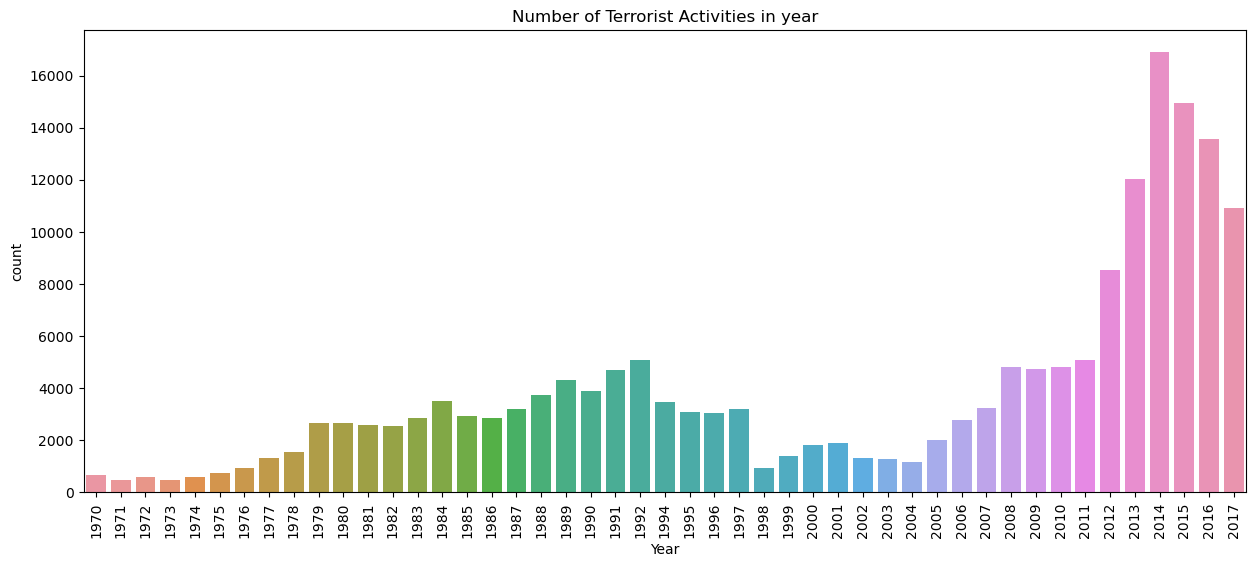

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Year', data=df)
plt.xticks(rotation = 90)
plt.title('Number of Terrorist Activities in year')
plt.show()

**#Attacking methods used**

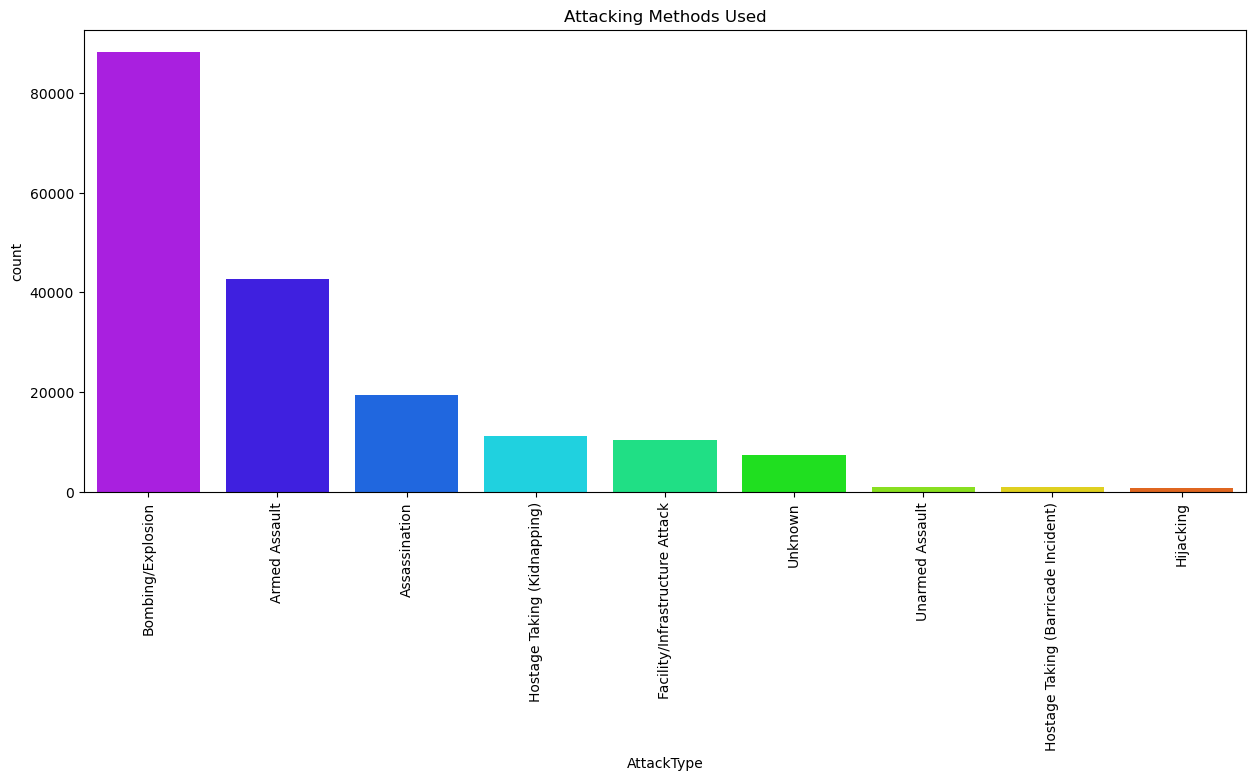

In [11]:
plt.subplots(figsize=(15,6))
sns.countplot(x='AttackType', data=df,palette='gist_rainbow_r',order=df['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Attacking Methods Used")
plt.show()

**#Number of attacks in each countries**

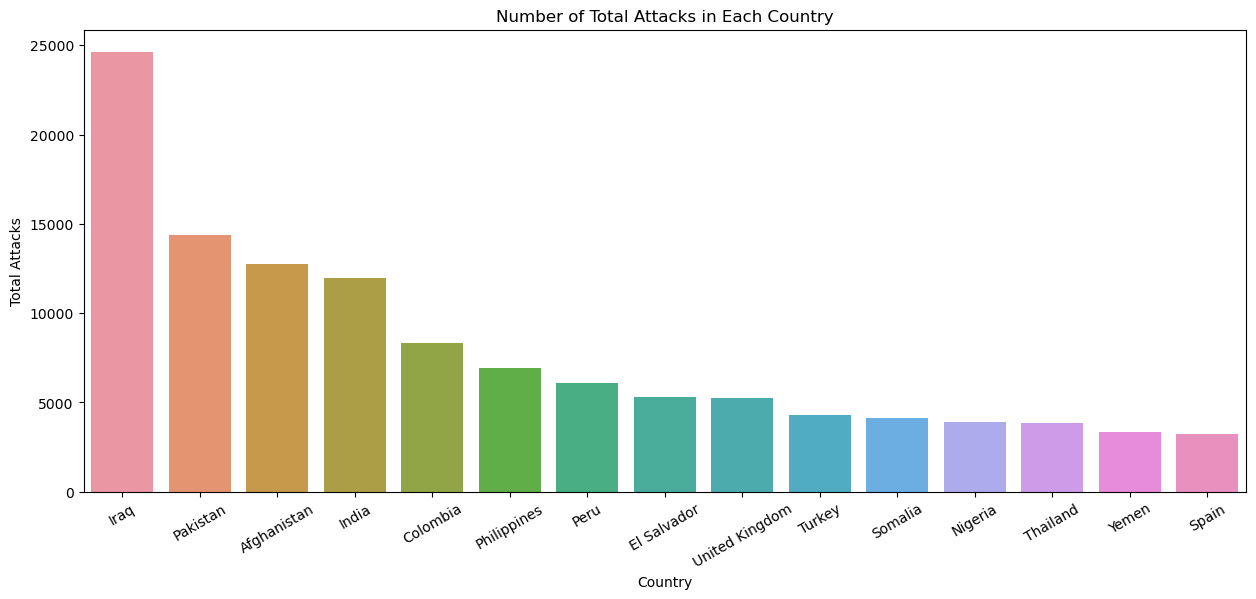

In [12]:
plt.subplots(figsize=(15,6))
country_attacks = df.Country.value_counts()[:15].reset_index()
country_attacks.columns = ['Country', 'Total Attacks']
sns.barplot(x=country_attacks.Country, y=country_attacks['Total Attacks'])
plt.xticks(rotation=30)
plt.title('Number of Total Attacks in Each Country')
plt.show()

**#Number of attacks in each region**

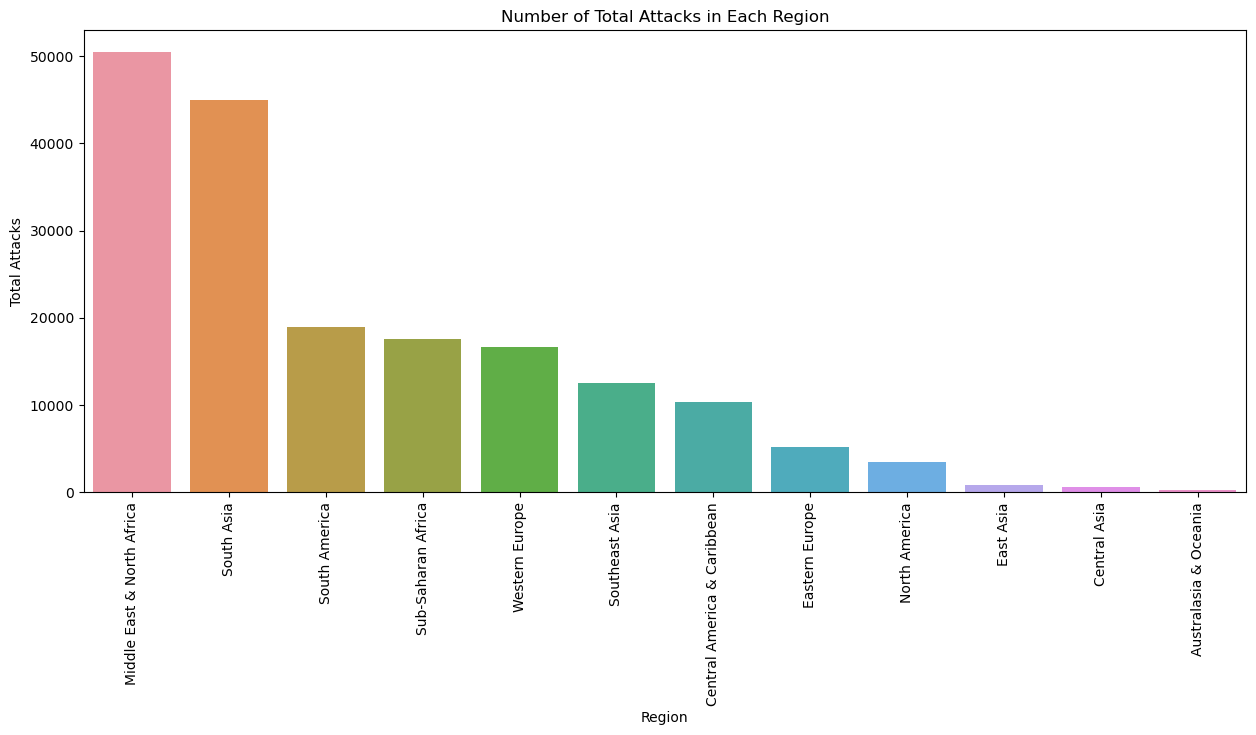

In [13]:
region_attacks = df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,6))
sns.barplot(x=region_attacks.Region, y=region_attacks['Total Attacks'])
plt.xticks(rotation=90)
plt.title('Number of Total Attacks in Each Region')
plt.show()

**#Timeline of Terrorist Attacks**

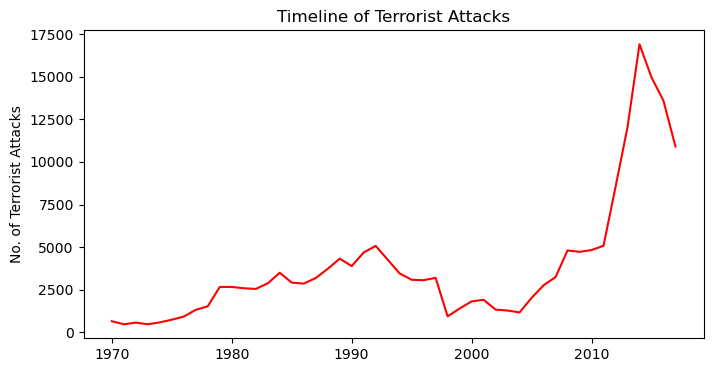

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(
    x=df["Year"].value_counts().index,
    y=df["Year"].value_counts().values,
    color="red",
    ax=ax 
)

plt.xlabel(None)
plt.ylabel("No. of Terrorist Attacks")
plt.title("Timeline of Terrorist Attacks");

**#Timeline of Terrorist Attacks per Region**

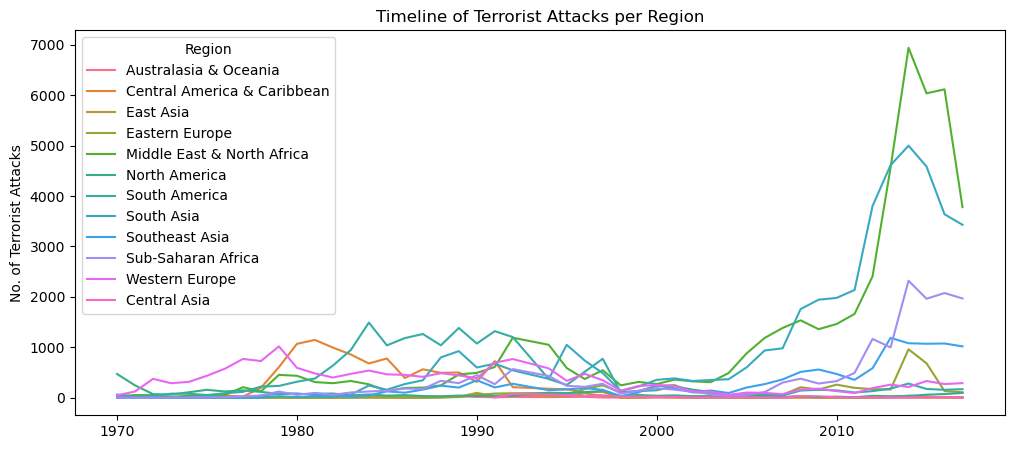

In [15]:
df_reg_year = df.groupby(['Year', 'Region']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(12, 5))
sns.lineplot(
    x="Year",
    y="count",
    hue="Region",
    data=df_reg_year,
    ax=ax 
)

plt.xlabel(None)
plt.ylabel("No. of Terrorist Attacks")
plt.title("Timeline of Terrorist Attacks per Region");

In [16]:
df.Group.value_counts()[1:10]

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

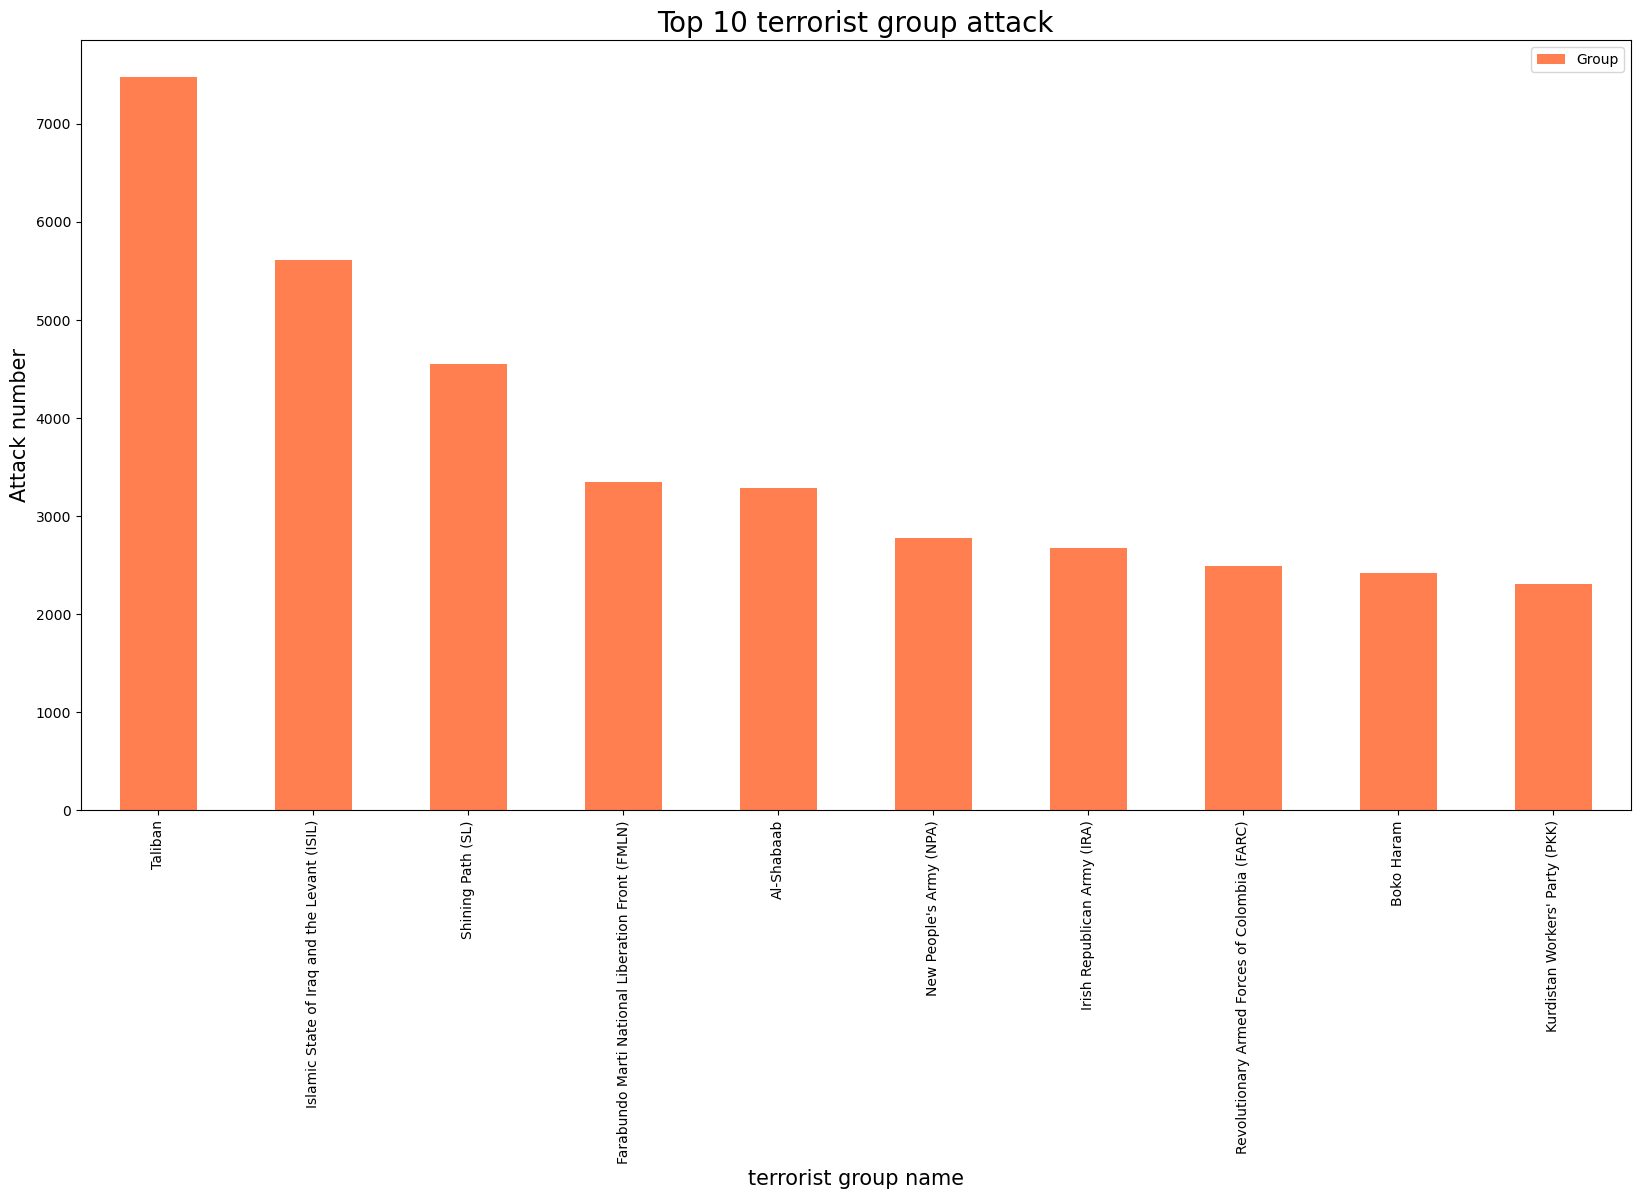

In [17]:
df['Group'].value_counts().to_frame().drop('Unknown').head(10).plot(kind='bar',color='coral',figsize=(20,10))
plt.title("Top 10 terrorist group attack",fontsize=20)
plt.xlabel("terrorist group name",fontsize=15)
plt.ylabel("Attack number",fontsize=15)
plt.show()

# #CONCLUSION

Country with the most attacks: 24636 in "Iraq"

City with the most attacks: 7589 in "Baghdad"

Region with the most attacks: 50474 in "Middle East & North Africa"

Year with the most attacks: 16903 in 2014

Month with the most attacks: 5

Group with the most attacks: 7478 by "Taliban"

Most Attack Types: 88255 by "Bombizens & Property"